**RAM Check**

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


**Importing the Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


**Importing the Dataset**

In [ ]:
#Training Set
train = pd.read_csv("Final Dataset - 2nd Wave Tweets.csv", encoding = "ISO-8859-1")
print(train.describe())

           polarity  subjectivity
count  19000.000000  19000.000000
mean       0.066277      0.345634
std        0.265553      0.298540
min       -1.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.324444
75%        0.200000      0.541667
max        1.000000      1.000000


**Data Pre-Processing**

In [ ]:
train.head()

,created_at,text,source,timestamp_ms,lang,polarity,subjectivity,sentiment
0,2021-06-26 18:16:16+00:00,@GreggJarrett: #COVID19 and China Dr. #FauciL...,"<a href=""http://twitter.com/download/android"" ...",16:16.3,en,0.000,0.500000,Neutral
1,2021-06-26 19:23:20+00:00,RT @KellDA: Why is no one talking about the fa...,"<a href=""http://twitter.com/download/iphone"" r...",23:20.2,en,0.500,0.500000,Positive
2,2021-06-26 18:19:48+00:00,I dont know what is in these so called vaccine...,"<a href=""http://twitter.com/download/iphone"" r...",19:48.1,en,0.000,0.000000,Neutral
3,2021-06-26 19:39:21+00:00,No thank you ! Please I want to reschedule and...,"<a href=""http://twitter.com/download/iphone"" r...",39:21.8,en,0.125,0.166667,Positive
4,2021-06-26 19:39:27+00:00,@PMOIndia @narendramodi please help #JUSTICEFO...,"<a href=""http://twitter.com/download/android"" ...",39:27.4,en,0.000,0.000000,Neutral


In [ ]:
#Checking for missing values in OriginalTweet and Sentiment

train1 = train.dropna(axis = 0, subset = [ 'text', 'sentiment'])
print(train1.isnull().sum())

train1

created_at      0
text            0
source          0
timestamp_ms    0
lang            0
polarity        0
subjectivity    0
sentiment       0
dtype: int64


,created_at,text,source,timestamp_ms,lang,polarity,subjectivity,sentiment
0,2021-06-26 18:16:16+00:00,@GreggJarrett: #COVID19 and China Dr. #FauciL...,"<a href=""http://twitter.com/download/android"" ...",16:16.3,en,0.000000,0.500000,Neutral
1,2021-06-26 19:23:20+00:00,RT @KellDA: Why is no one talking about the fa...,"<a href=""http://twitter.com/download/iphone"" r...",23:20.2,en,0.500000,0.500000,Positive
2,2021-06-26 18:19:48+00:00,I dont know what is in these so called vaccine...,"<a href=""http://twitter.com/download/iphone"" r...",19:48.1,en,0.000000,0.000000,Neutral
3,2021-06-26 19:39:21+00:00,No thank you ! Please I want to reschedule and...,"<a href=""http://twitter.com/download/iphone"" r...",39:21.8,en,0.125000,0.166667,Positive
4,2021-06-26 19:39:27+00:00,@PMOIndia @narendramodi please help #JUSTICEFO...,"<a href=""http://twitter.com/download/android"" ...",39:27.4,en,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
18995,2021-06-26 18:17:18+00:00,RT @Ian_Burnett_: On this Armed Forces Day it'...,"<a href=""http://twitter.com/download/iphone"" r...",17:18.2,en,-0.333333,0.766667,Negative
18996,2021-06-26 19:34:19+00:00,RT @ChrisDWilliams: See now this is massive. T...,"<a href=""http://twitter.com/#!/download/ipad"" ...",34:19.3,en,0.000000,1.000000,Neutral
18997,2021-06-26 19:03:47+00:00,RT @nick_the_geek78: Four simple steps to end ...,"<a href=""http://twitter.com/download/android"" ...",03:47.0,en,0.000000,0.357143,Neutral
18998,2021-06-26 19:31:45+00:00,Me gaining weight during the pandemic makes me...,"<a href=""http://twitter.com/download/iphone"" r...",31:46.0,en,0.200000,0.200000,Positive


**Bag of Words Model**

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tweet = [] #To hold cleaned abstract of the Tweets
stemmer = PorterStemmer() #Calling the object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pip install tweet-preprocessor

In [ ]:
#import preprocessor as p

In [ ]:
from preprocessor.api import clean, tokenize, parse

In [ ]:
#import preprocessor as p
#forming a separate feature for cleaned tweets
for a in range(19000):
    x = train1['text'][a]
    train1.loc[a,'text'] = clean(x)

#for b in range(18508,18797):
#    y = train['text'][b]
#    train.loc[b, 'text'] = clean(x)    

In [ ]:
for i in range(19000):
  tw = re.sub('[^a-zA-Z]', ' ' , train1['text'][i]) #Replacing not letters by spaces
  tw = tw.lower() #Converting to LowerCase
  tw = tw.split() #Splitting the Tweet content into words
  tw = [stemmer.stem(word) for word in tw if not word.lower() in set(stopwords.words('english'))] #Excluding Stopwords from Stemming
  tw = ' '.join(tw) #Joining back the stemmed words
  tweet.append(tw) #Adding the processed sentences in new list

#for j in range(18508,18797):
#  tw = re.sub('[^a-zA-Z]', ' ' , train1['OriginalTweet'][i]) #Replacing not letters by spaces
#  tw = tw.lower() #Converting to LowerCase
#  tw = tw.split() #Splitting the Abstract into words
#  tw = [stemmer.stem(word) for word in tw if not word.lower() in set(stopwords.words('english'))] #Excluding Stopwords from Stemming
#  tw = ' '.join(tw) #Joining back the stemmed words
#  tweet.append(tw) #Adding the processed abstract in new list



In [ ]:
tweet[1:5]

['one talk fact k american die pandem held job may pa',
 'dont know call vaccin know covid',
 'thank pleas want reschedul wait till mid juli first dose',
 'pleas help']

**Encoding Sentiment into Categorical Scale**

In [ ]:
pip install category_encoders

     |████████████████████████████████| 80 kB 6.3 MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Encoding Sentiment into a five-point categorical column

encoder= ce.OrdinalEncoder(cols=['sentiment'], return_df=True, mapping=[{'col':'sentiment', 'mapping':{'Positive':1,'Neutral':2,'Negative':3}}])

train2 = encoder.fit_transform(train1)
train.head(10)
#train2.head(10)

train1['sentiment'].value_counts()


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Neutral     8059
Positive    7331
Negative    3610
Name: sentiment, dtype: int64

In [ ]:
train2['sentiment'].value_counts()

2    8059
1    7331
3    3610
Name: sentiment, dtype: int64

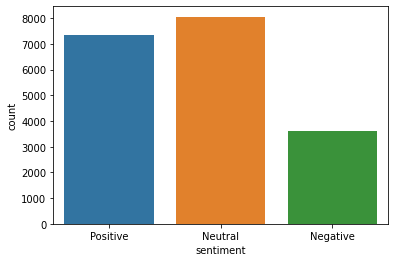

In [ ]:
import seaborn as sns

plot = sns.countplot(x='sentiment', data=train2).set_xticklabels(labels=['Positive', 'Neutral', 'Negative'], rotation = 0)

Minimising Categories (Not required for 2nd wave tweets)


In [ ]:
def merge_categories(y):
    if y == 1 or y == 2:
        return 1
    elif y == 3:
        return 2
    elif y == 4 or y == 5:
        return 3


In [ ]:
train2["Sentiment"] = train2["Sentiment"].apply(merge_categories)
print(train2.head())


In [ ]:
train2['Sentiment'].value_counts()


1    8155
3    7183
2    3459
Name: Sentiment, dtype: int64

[Text(0, 0, 'Positive'), Text(0, 0, 'Neutral'), Text(0, 0, 'Negative')]

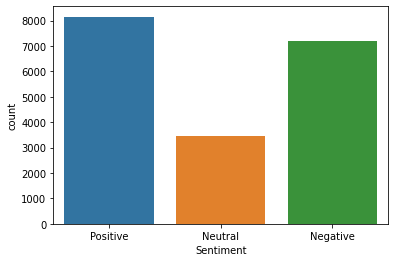

In [ ]:
sns.countplot(x='Sentiment', data=train2).set_xticklabels(labels=['Positive', 'Neutral', 'Negative'], rotation = 0)

**Word Clouds**

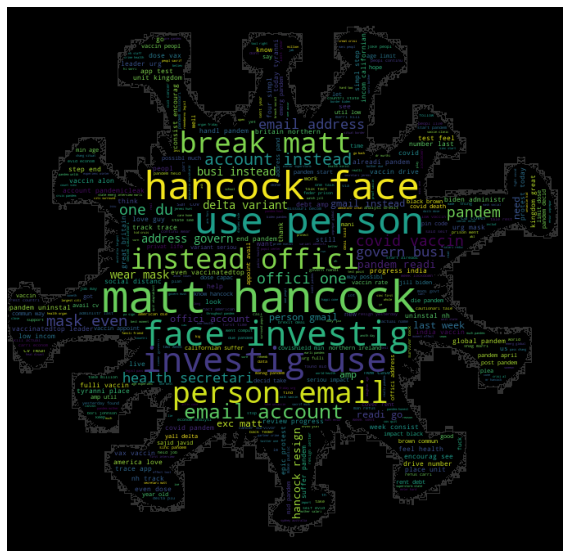

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
import io
response = requests.get("https://res.cloudinary.com/maxie/image/upload/v1617197755/TEMP/covid_ywd7ph.jpg")
image_bytes = io.BytesIO(response. content)
dataset = " ".join(tweet)
def word_cloud(string):
    maskArray = np.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "black", max_words = 450, mask = maskArray, stopwords = set(STOPWORDS),contour_width=1, contour_color='#333')
    cloud.generate(string)
#     cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud=word_cloud(dataset)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

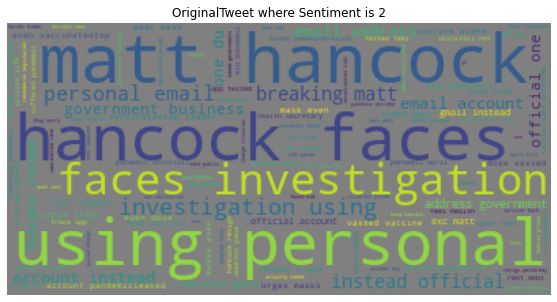

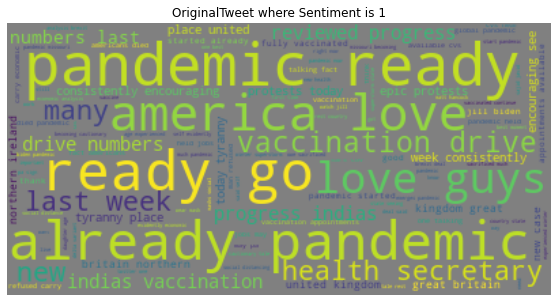

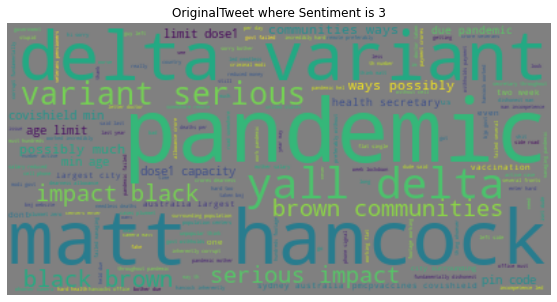

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "amp", "coronavirus", "covid", "covid19", "t", "co", "people", "will"])

for i, target in enumerate(train2['sentiment'].unique()):
    text = " ".join(tweet for tweet in train2[train2['sentiment']==target]['text'].str.lower().fillna(''))
    wordcloud = WordCloud(stopwords=stopwords, background_color="grey").generate(text)
    plt.subplots(figsize=(20,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("OriginalTweet where Sentiment is "+str(target))
    plt.axis("off")
    plt.show()



In [ ]:
len(tweet)

19000

#**Implementation using CountVectoriser**

In [ ]:
#Parse Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() #Tokenisation
X = cv.fit_transform(tweet).toarray() #Matrix of features should be in 2d Array for Naive Bayes

Y = train2.iloc[:, -1].values


In [ ]:
len(Y)

19000

In [ ]:
a = 18507
Y = np.delete(Y,a) 

In [ ]:
type(Y)

numpy.ndarray

**Splitting the Dataset into Training and Test set**

In [ ]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

ValueError: ignored

In [ ]:
len(Y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import plot_confusion_matrix

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train, Y_train)

In [ ]:
Y_pred_rfc_test = rfc.predict(X_test)
Y_pred_rfc_test

In [ ]:
Y_pred_rfc_train = rfc.predict(X_train)
Y_pred_rfc_train

*Confusion Matrix and Accuracy Score*


In [ ]:
cm_rfc_test = confusion_matrix(Y_test, Y_pred_rfc_test)
print(cm_rfc_test)

In [ ]:
cm_rfc_train = confusion_matrix(Y_train, Y_pred_rfc_train)
print(cm_rfc_train)

In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Training Set):", accuracy_score(Y_test, Y_pred_rfc_train))

In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_rfc_test))

In [ ]:
plot_confusion_matrix(rfc, X_test, Y_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

In [ ]:
sns.heatmap(cm_rfc_test/np.sum(cm_rfc_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='magma')

In [ ]:
plot_confusion_matrix(rfc, X_train, Y_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

In [ ]:
sns.heatmap(cm_rfc_train/np.sum(cm_rfc_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='magma')

**Gaussian Naive Bayes Classifier**

In [ ]:
#Naive Bayes Classifier Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)


In [ ]:
Y_pred_gnb_test = gnb.predict(X_test)
Y_pred_gnb_test

In [ ]:
Y_pred_gnb_train = gnb.predict(X_train)
Y_pred_gnb_train

*Scatter Plot - Ignore, for now.*

*Confusion Matrix and Accuracy Score*

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm_gnb_test = confusion_matrix(Y_test, Y_pred_gnb_test)
print(cm_gnb_test)

In [ ]:
cm_gnb_train = confusion_matrix(Y_train, Y_pred_gnb_train)
print(cm_gnb_train)

Test Set Accuracy

In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_gnb_test))

In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_gnb_train))

Visualising Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

In [ ]:
sns.heatmap(cm_gnb_test/np.sum(cm_gnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='magma')

In [ ]:
plot_confusion_matrix(gnb, X_train, Y_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap="GnBu")

In [ ]:
sns.heatmap(cm_gnb_train/np.sum(cm_gnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Pastel1')

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

In [ ]:
#from sklearn import metrics
#score = metrics.accuracy_score(predicted, Y_test)

Y_pred_mnb_test = mnb.predict(X_test)
Y_pred_mnb_train = mnb.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_mnb_test = confusion_matrix(Y_test, Y_pred_mnb_test)
print(cm_mnb_test)
cm_mnb_train = confusion_matrix(Y_test, Y_pred_mnb_train)
print(cm_mnb_train)

In [ ]:
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_mnb_test))
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_mnb_train))

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb, X_test, Y_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap='RdPu')

In [ ]:
sns.heatmap(cm_mnb_test/np.sum(cm_mnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='copper')

In [ ]:
sns.heatmap(cm_mnb_train/np.sum(cm_mnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='PRGn')

**Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

In [ ]:
Y_pred_bnb_test = bnb.predict(X_test)
Y_pred_bnb_train = bnb.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_bnb_test = confusion_matrix(Y_test, Y_pred_bnb_test)
print(cm_bnb_test)
cm_bnb_train = confusion_matrix(Y_test, Y_pred_bnb_train)
print(cm_bnb_train)

In [ ]:
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_bnb_test))
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_bnb_train))

In [ ]:
sns.heatmap(cm_bnb_test/np.sum(cm_bnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Spectral')

In [ ]:
sns.heatmap(cm_bnb_train/np.sum(cm_bnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='ocean')

**Complement Naive Bayes**

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, Y_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_cnb_test = confusion_matrix(Y_test, Y_pred_cnb_test)
print(cm_cnb_test)
cm_cnb_train = confusion_matrix(Y_test, Y_pred_cnb_train)
print(cm_cnb_train)

In [ ]:
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_cnb_test))
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_vnb_train))

In [ ]:
sns.heatmap(cm_cnb_test/np.sum(cm_cnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='twilight_shifted')

In [ ]:
sns.heatmap(cm_cnb_train/np.sum(cm_cnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='tab20b')

#**Implementation using TF-IDF**


In [ ]:
tfidf = TfidfVectorizer()

X1 = tfidf.fit_transform(tweet).toarray()
Y1 = train2.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X1_train, Y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred_rfc_test = rfc.predict(X1_test)
Y_pred_rfc_test

array([1, 2, 1, ..., 1, 2, 2])

In [ ]:
Y_pred_rfc_train = rfc.predict(X1_train)
Y_pred_rfc_train

array([1, 2, 1, ..., 2, 2, 1])

*Confusion Matrix and Accuracy Score*


In [ ]:
cm_rfc_test = confusion_matrix(Y1_test, Y_pred_rfc_test)
print(cm_rfc_test)

[[1624  191   31]
 [  93 1890    9]
 [ 104  139  669]]


In [ ]:
cm_rfc_train = confusion_matrix(Y1_train, Y_pred_rfc_train)
print(cm_rfc_train)

[[5459   22    4]
 [  13 6052    2]
 [  25   25 2648]]


In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Training Set):", accuracy_score(Y1_train, Y_pred_rfc_train))

Accuracy Score of the Random Forest Classifier Model (Training Set): 0.9936140350877193


In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_rfc_test))

Accuracy Score of the Random Forest Classifier Model (Test Set): 0.8806315789473684


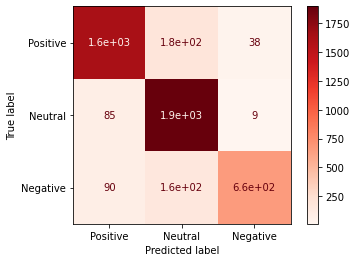

In [ ]:
plot_confusion_matrix(rfc, X1_test, Y1_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

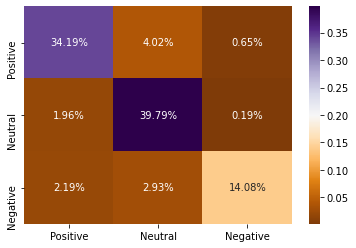

In [ ]:
sns.heatmap(cm_rfc_test/np.sum(cm_rfc_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='PuOr')

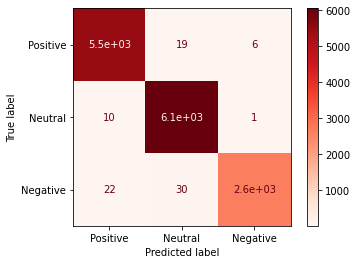

In [ ]:
plot_confusion_matrix(rfc, X1_train, Y1_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

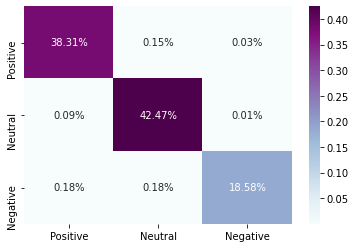

In [ ]:
sns.heatmap(cm_rfc_train/np.sum(cm_rfc_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='BuPu')

**Gaussian Naive Bayes Classifier**

In [ ]:
#Naive Bayes Classifier Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X1_train, Y1_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred_gnb_test = gnb.predict(X1_test)
Y_pred_gnb_test

array([1, 1, 1, ..., 1, 2, 2])

In [ ]:
Y_pred_gnb_train = gnb.predict(X1_train)
Y_pred_gnb_train

array([3, 3, 3, ..., 2, 3, 1])

*Confusion Matrix and Accuracy Score*

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm_gnb_test = confusion_matrix(Y1_test, Y_pred_gnb_test)
print(cm_gnb_test)

[[1009  221  616]
 [ 136 1011  845]
 [ 105   77  730]]


In [ ]:
cm_gnb_train = confusion_matrix(Y1_train, Y_pred_gnb_train)
print(cm_gnb_train)

[[3827  233 1425]
 [   5 3806 2256]
 [   0    0 2698]]


In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_gnb_test))

Accuracy Score of the Gaussian Naive Bayes Classifier Model (Test Set): 0.5789473684210527


In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_gnb_train))

Accuracy Score of the Gaussian Naive Bayes Classifier Model (Train Set): 0.7249824561403508


Visualising Confusion Matrix

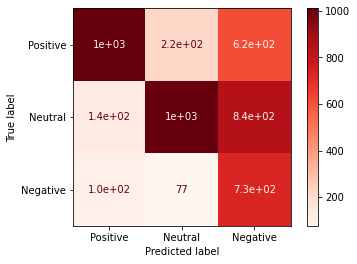

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X1_test, Y1_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

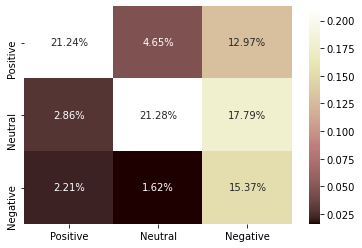

In [ ]:
sns.heatmap(cm_gnb_test/np.sum(cm_gnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='pink')

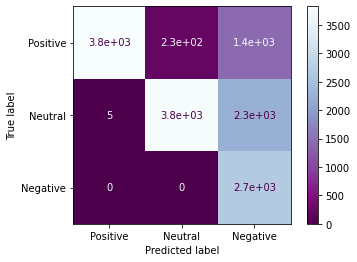

In [ ]:
plot_confusion_matrix(gnb, X1_train, Y1_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap="BuPu_r")

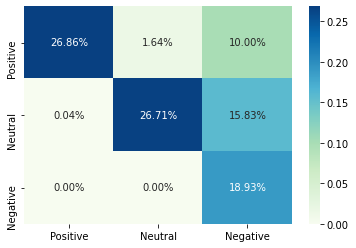

In [ ]:
sns.heatmap(cm_gnb_train/np.sum(cm_gnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='GnBu')

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X1_train, Y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#from sklearn import metrics
#score = metrics.accuracy_score(predicted, Y_test)

Y_pred_mnb_test = mnb.predict(X1_test)
Y_pred_mnb_train = mnb.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_mnb_test = confusion_matrix(Y1_test, Y_pred_mnb_test)
print(cm_mnb_test)
cm_mnb_train = confusion_matrix(Y1_train, Y_pred_mnb_train)
print(cm_mnb_train)

[[1688  145   13]
 [ 365 1608   19]
 [ 267  149  496]]
[[5255  205   25]
 [ 651 5372   44]
 [ 632  321 1745]]


In [ ]:
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_mnb_test))
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_mnb_train))

Accuracy Score of the Multinomial Naive Bayes Classifier Model (Test Set): 0.7983157894736842
Accuracy Score of the Multinomial Naive Bayes Classifier Model (Train Set): 0.8682105263157894


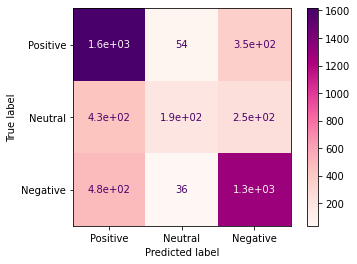

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb, X1_test, Y1_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap='RdPu')

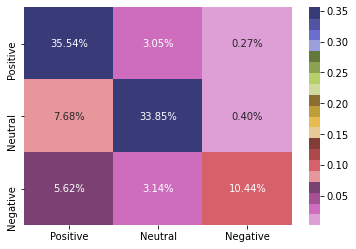

In [ ]:
sns.heatmap(cm_mnb_test/np.sum(cm_mnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='tab20b_r')

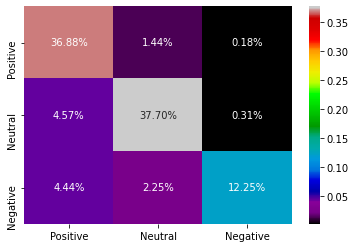

In [ ]:
sns.heatmap(cm_mnb_train/np.sum(cm_mnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='nipy_spectral')

**Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X1_train, Y1_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
Y_pred_bnb_test = bnb.predict(X1_test)
Y_pred_bnb_train = bnb.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_bnb_test = confusion_matrix(Y1_test, Y_pred_bnb_test)
print(cm_bnb_test)
cm_bnb_train = confusion_matrix(Y1_train, Y_pred_bnb_train)
print(cm_bnb_train)

[[1678   98   70]
 [ 399 1519   74]
 [ 206   83  623]]
[[5234  155   96]
 [ 801 5132  134]
 [ 391  166 2141]]


In [ ]:
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_bnb_test))
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_bnb_train))

Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Test Set): 0.8042105263157895
Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Train Set): 0.8776842105263158


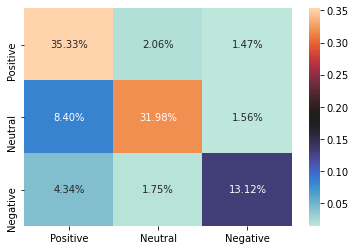

In [ ]:
sns.heatmap(cm_bnb_test/np.sum(cm_bnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='icefire')

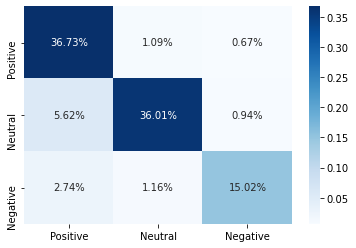

In [ ]:
sns.heatmap(cm_bnb_train/np.sum(cm_bnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Blues')

**Complement Naive Bayes**

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X1_train, Y1_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [ ]:
Y_pred_cnb_test = cnb.predict(X1_test)
Y_pred_cnb_train = cnb.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_cnb_test = confusion_matrix(Y1_test, Y_pred_cnb_test)
print(cm_cnb_test)
cm_cnb_train = confusion_matrix(Y1_train, Y_pred_cnb_train)
print(cm_cnb_train)

[[1621  123  102]
 [ 342 1454  196]
 [ 123   71  718]]
[[5148  176  161]
 [ 748 4970  349]
 [ 209  115 2374]]


In [ ]:
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_cnb_test))
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_cnb_train))

Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set): 0.7985263157894736
Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set): 0.8766315789473684


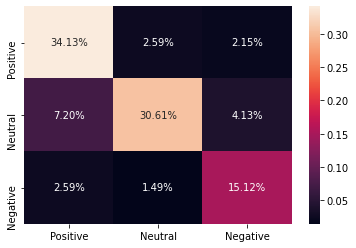

In [ ]:
sns.heatmap(cm_cnb_test/np.sum(cm_cnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='rocket')

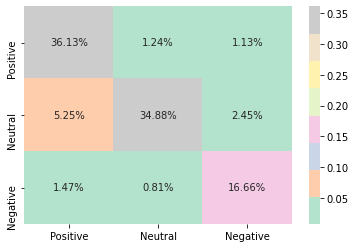

In [ ]:
sns.heatmap(cm_cnb_train/np.sum(cm_cnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Pastel2')

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X1_train, Y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred_svm_test = SVM.predict(X1_test)
Y_pred_svm_train = SVM.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_svm_test = confusion_matrix(Y1_test, Y_pred_svm_test)
print(cm_svm_test)
cm_svm_train = confusion_matrix(Y1_train, Y_pred_svm_train)
print(cm_svm_train)

[[1595  207   44]
 [  89 1888   15]
 [  88  136  688]]
[[5234  207   44]
 [  76 5968   23]
 [ 103  168 2427]]


In [ ]:
print("Accuracy Score of the Support Vector Machine Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_svm_test))
print("Accuracy Score of the Support Vector Machine Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_svm_train))

Accuracy Score of the Support Vector Machine Classifier Model (Test Set): 0.8781052631578947
Accuracy Score of the Support Vector Machine Classifier Model (Train Set): 0.956421052631579


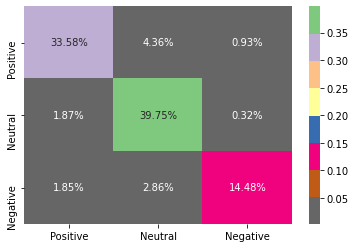

In [ ]:
sns.heatmap(cm_svm_test/np.sum(cm_svm_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Accent_r')

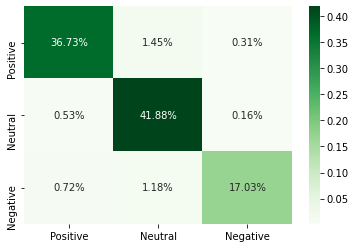

In [ ]:
sns.heatmap(cm_svm_train/np.sum(cm_svm_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Greens')

**Adaptive Boosting (AdaBoost) Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(dt, n_estimators = 100, learning_rate = 1)
ada.fit(X1_train, Y1_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
Y_pred_ada_test = ada.predict(X1_test)
Y_pred_ada_train = ada.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_ada_test = confusion_matrix(Y1_test, Y_pred_ada_test)
print(cm_ada_test)
cm_ada_train = confusion_matrix(Y1_train, Y_pred_ada_train)
print(cm_ada_train)

[[1280  496   70]
 [  87 1871   34]
 [  89  321  502]]
[[3867 1442  176]
 [ 208 5739  120]
 [ 253  863 1582]]


In [ ]:
print("Accuracy Score of the Adaptive Boosting Model (Test Set):", accuracy_score(Y1_test, Y_pred_ada_test))
print("Accuracy Score of the Adaptive Model (Train Set):", accuracy_score(Y1_train, Y_pred_ada_train))

Accuracy Score of the Adaptive Boosting Model (Test Set): 0.7690526315789473
Accuracy Score of the Adaptive Model (Train Set): 0.7851228070175439


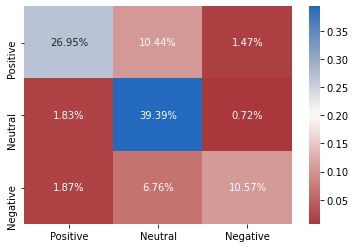

In [ ]:
sns.heatmap(cm_ada_test/np.sum(cm_ada_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='vlag_r')

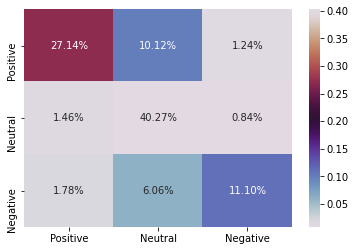

In [ ]:
sns.heatmap(cm_ada_train/np.sum(cm_ada_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='twilight')

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gb.fit(X1_train,Y1_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_pred_gb_test = gb.predict(X1_test)
Y_pred_gb_train = gb.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_gb_test = confusion_matrix(Y1_test, Y_pred_gb_test)
print(cm_gb_test)
cm_gb_train = confusion_matrix(Y1_train, Y_pred_gb_train)
print(cm_gb_train)

[[1466  309   71]
 [  83 1879   30]
 [  83  195  634]]
[[4521  783  181]
 [ 134 5855   78]
 [ 212  464 2022]]


In [ ]:
print("Accuracy Score of the Gradient Boosting Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_gb_test))
print("Accuracy Score of the Gradient Boosting Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_gb_train))

Accuracy Score of the Gradient Boosting Classifier Model (Test Set): 0.8376842105263158
Accuracy Score of the Gradient Boosting Classifier Model (Train Set): 0.8700350877192983


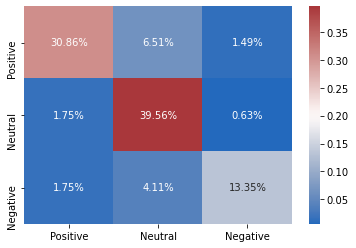

In [ ]:
sns.heatmap(cm_gb_test/np.sum(cm_gb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='vlag')

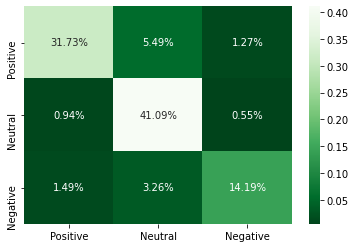

In [ ]:
sns.heatmap(cm_gb_train/np.sum(cm_gb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Greens_r')

**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X1_train, Y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred_xgb_test = xgb.predict(X1_test)
Y_pred_xgb_train = xgb.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_xgb_test = confusion_matrix(Y1_test, Y_pred_xgb_test)
print(cm_xgb_test)
cm_xgb_train = confusion_matrix(Y1_train, Y_pred_xgb_train)
print(cm_xgb_train)

[[1170  655   21]
 [  27 1961    4]
 [  76  488  348]]
[[3488 1946   51]
 [  41 6022    4]
 [ 221 1386 1091]]


In [ ]:
print("Accuracy Score of the XGBoost Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_xgb_test))
print("Accuracy Score of the XGBoost Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_xgb_train))

Accuracy Score of the XGBoost Classifier Model (Test Set): 0.732421052631579
Accuracy Score of the XGBoost Classifier Model (Train Set): 0.7439298245614036


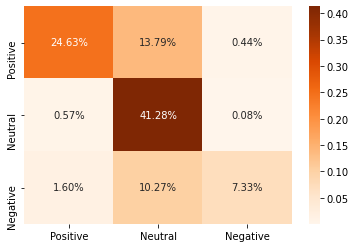

In [ ]:
sns.heatmap(cm_xgb_test/np.sum(cm_xgb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Oranges')

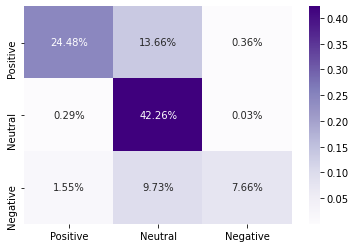

In [ ]:
sns.heatmap(cm_xgb_train/np.sum(cm_xgb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Purples')